In [ ]:
# transform univariate time series to supervised learning problem
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

# define univariate time series
series = array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(series.shape)

# transform to a supervised learning problem
X, y = split_sequence(series, 3)
print(X.shape, y.shape)

# show each sample
for i in range(len(X)):
  print(X[i], y[i])

(10,)
(7, 3) (7,)
[1 2 3] 4
[2 3 4] 5
[3 4 5] 6
[4 5 6] 7
[5 6 7] 8
[6 7 8] 9
[7 8 9] 10


In [ ]:
# transform univariate 2d to 3d
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

# define univariate time series
series = array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(series.shape)
# transform to a supervised learning problem
X, y = split_sequence(series, 3)
print(X.shape, y.shape)
# transform input from [samples, features] to [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
print(X.shape)

(10,)
(7, 3) (7,)
(7, 3, 1)


In [ ]:
# example of defining a dataset
from numpy import array

# define the dataset
data = list()
n = 5000
for i in range(n):
  data.append([i+1, (i+1)*10])
data = array(data)
print(data[:5, :])
print(data.shape)

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]
 [ 5 50]]
(5000, 2)


In [ ]:
# example of splitting a univariate sequence into subsequences
from numpy import array
# define the dataset
data = list()
n = 5000
for i in range(n):
  data.append([i+1, (i+1)*10])
data = array(data)
# drop time
data = data[:, 1]
# split into samples (e.g. 5000/200 = 25)
samples = list()
length = 200
# step over the 5,000 in jumps of 200
for i in range(0,n,length):
  # grab from i to i + 200
  sample = data[i:i+length]
  samples.append(sample)
print(len(samples))

25


In [ ]:
# example of creating an array of subsequence
from numpy import array
# define the dataset
data = list()
n = 5000
for i in range(n):
  data.append([i+1, (i+1)*10])
data = array(data)
# drop time
data = data[:, 1]
# split into samples (e.g. 5000/200 = 25)
samples = list()
length = 200
# step over the 5,000 in jumps of 200
for i in range(0,n,length):
  # grab from i to i + 200
  sample = data[i:i+length]
  samples.append(sample)
# convert list of arrays into 2d array
data = array(samples)
print(data.shape)

(25, 200)


In [ ]:
# example of creating a 3d array of subsequences
from numpy import array
# define the dataset
data = list()
n = 5000
for i in range(n):
  data.append([i+1, (i+1)*10])
data = array(data)
# drop time
data = data[:, 1]
# split into samples (e.g. 5000/200 = 25)
samples = list()
length = 200
# step over the 5,000 in jumps of 200
for i in range(0,n,length):
  # grab from i to i + 200
  sample = data[i:i+length]
  samples.append(sample)
# convert list of arrays into 2d array
data = array(samples)
# reshape into [samples, timesteps, features]
data = data.reshape((len(samples), length, 1))
print(data.shape)

(25, 200, 1)


In [ ]:
# univariate data preparation
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
  print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


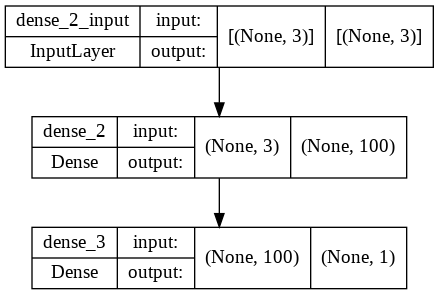

In [ ]:
n_steps = 3
# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
# split into samples
X, y = split_sequence(raw_seq, n_steps)

# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

plot_model(model, to_file='mlp-mnist.png', show_shapes=True)


In [ ]:
# fit model
model.fit(X, y, epochs=2000, verbose=1)

Epoch 1/2000
1/1 [==============================] - 1s 1s/step - loss: 2009.1757
Epoch 2/2000
1/1 [==============================] - 0s 16ms/step - loss: 1887.3560
Epoch 3/2000
1/1 [==============================] - 0s 16ms/step - loss: 1769.6063
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 1655.9487
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 1546.0752
Epoch 6/2000
1/1 [==============================] - 0s 10ms/step - loss: 1439.8976
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 1337.2985
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 1238.3719
Epoch 9/2000
1/1 [==============================] - 0s 14ms/step - loss: 1143.5878
Epoch 10/2000
1/1 [==============================] - 0s 14ms/step - loss: 1053.0096
Epoch 11/2000
1/1 [==============================] - 0s 12ms/step - loss: 966.4097
Epoch 12/2000
1/1 [==============================] - 0s 14ms/step - loss: 883.9976
Epoch 

In [ ]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[101.78428]]


In [ ]:
# multivariate data preparation
from numpy import array
from numpy import hstack
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
print(dataset)

[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]


In [ ]:
# multivariate data preparation
from numpy import array
from numpy import hstack
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
  X, y = list(), list()
  for i in range(len(sequences)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the dataset
    if end_ix > len(sequences):
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
  print(X[i], y[i])

(7, 3, 2) (7,)
[[10 15]
 [20 25]
 [30 35]] 65
[[20 25]
 [30 35]
 [40 45]] 85
[[30 35]
 [40 45]
 [50 55]] 105
[[40 45]
 [50 55]
 [60 65]] 125
[[50 55]
 [60 65]
 [70 75]] 145
[[60 65]
 [70 75]
 [80 85]] 165
[[70 75]
 [80 85]
 [90 95]] 185


In [ ]:
# multivariate mlp example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
  X, y = list(), list()
  for i in range(len(sequences)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the dataset
    if end_ix > len(sequences):
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps = 3

# convert into input/output
X, y = split_sequences(dataset, n_steps)

# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=2000, verbose=0)

# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_input))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[206.68773]]


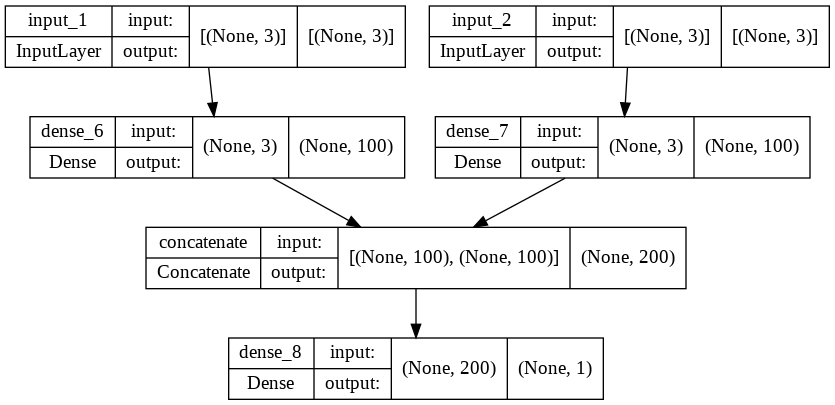

In [ ]:
# multivariate mlp example
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
from tensorflow.keras.utils import plot_model

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
  X, y = list(), list()
  for i in range(len(sequences)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the dataset
    if end_ix > len(sequences):
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)
  # define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps = 3

# convert into input/output
X, y = split_sequences(dataset, n_steps)

# separate input data
X1 = X[:, :, 0]
X2 = X[:, :, 1]

# first input model
visible1 = Input(shape=(n_steps,))
dense1 = Dense(100, activation='relu')(visible1)

# second input model
visible2 = Input(shape=(n_steps,))
dense2 = Dense(100, activation='relu')(visible2)
# merge input models
merge = concatenate([dense1, dense2])
output = Dense(1)(merge)
model = Model(inputs=[visible1, visible2], outputs=output)

plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit([X1, X2], y, epochs=2000, verbose=0)

In [ ]:
# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x1 = x_input[:, 0].reshape((1, n_steps))
x2 = x_input[:, 1].reshape((1, n_steps))
yhat = model.predict([x1, x2], verbose=0)
print(yhat)


[[205.58012]]


In [ ]:
# load one file from the har dataset
from pandas import read_csv
# load a single file as a numpy array
def load_file(filepath):
  dataframe = read_csv(filepath, header=None, delim_whitespace=True)
  return dataframe.values

data = load_file('/content/drive/MyDrive/HARDataset/train/Inertial Signals/total_acc_y_train.txt')
print(data.shape)

(7352, 128)


In [ ]:
# load group of files from the har dataset
from numpy import dstack
from pandas import read_csv

# load a single file as a numpy array
def load_file(filepath):
  dataframe = read_csv(filepath, header=None, delim_whitespace=True)
  return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
  loaded = list()
  for name in filenames:
    data = load_file(prefix + name)
    loaded.append(data)
  # stack group so that features are the 3rd dimension
  loaded = dstack(loaded)
  return loaded

# load the total acc data
filenames = ['total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']
total_acc = load_group(filenames, prefix='/content/drive/MyDrive/HARDataset/train/Inertial Signals/')
print(total_acc.shape)

(7352, 128, 3)


In [ ]:
# load all train and test data from the har dataset
from numpy import dstack
from pandas import read_csv

# load a single file as a numpy array
def load_file(filepath):
  dataframe = read_csv(filepath, header=None, delim_whitespace=True)
  return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix='/content/drive/MyDrive/HARDataset/train/Inertial Signals/'):
  loaded = list()
  for name in filenames:
    data = load_file(prefix + name)
    loaded.append(data)
  # stack group so that features are the 3rd dimension
  loaded = dstack(loaded)
  return loaded
  # load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
  filepath = prefix + group + '/Inertial Signals/'
  # load all 9 files as a single array
  filenames = list()
  # total acceleration
  filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt',
  'total_acc_z_'+group+'.txt']
  # body acceleration
  filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt',
  'body_acc_z_'+group+'.txt']
  # body gyroscope
  filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt',
  'body_gyro_z_'+group+'.txt']
  # load input data
  X = load_group(filenames, filepath)
  # load class output
  y = load_file(prefix + group + '/y_'+group+'.txt')
  return X, y

# load all train
trainX, trainy = load_dataset_group('train', '/content/drive/MyDrive/HARDataset/')
print(trainX.shape, trainy.shape)
# load all test
testX, testy = load_dataset_group('test', '/content/drive/MyDrive/HARDataset/')
print(testX.shape, testy.shape)

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)


In [ ]:
# lstm model for the har dataset
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical

# load a single file as a numpy array
def load_file(filepath):
  dataframe = read_csv(filepath, header=None, delim_whitespace=True)
  return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix='/content/drive/MyDrive/HARDataset/train/Inertial Signals/'):
  loaded = list()
  for name in filenames:
    data = load_file(prefix + name)
    loaded.append(data)
  # stack group so that features are the 3rd dimension
  loaded = dstack(loaded)
  return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
  filepath = prefix + group + '/Inertial Signals/'
  # load all 9 files as a single array
  filenames = list()
  # total acceleration
  filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt',
  'total_acc_z_'+group+'.txt']
  # body acceleration
  filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt',
  'body_acc_z_'+group+'.txt']
  # body gyroscope
  filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt',
  'body_gyro_z_'+group+'.txt']
  # load input data
  X = load_group(filenames, filepath)
  # load class output
  y = load_file(prefix + group + '/y_'+group+'.txt')
  return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
  # load all train
  trainX, trainy = load_dataset_group('train', prefix + '/content/drive/MyDrive/HARDataset/')
  # load all test
  testX, testy = load_dataset_group('test', prefix + '/content/drive/MyDrive/HARDataset/')
  # zero-offset class values
  trainy = trainy - 1
  testy = testy - 1
  # one hot encode y
  trainy = to_categorical(trainy)
  testy = to_categorical(testy)
  return trainX, trainy, testX, testy
  # fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
  verbose, epochs, batch_size = 1, 15, 64
  n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
  model = Sequential()
  model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
  model.add(Dropout(0.5))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_outputs, activation='softmax'))  
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  # fit network
  model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
  # evaluate model
  _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
  return accuracy

# summarize scores
def summarize_results(scores):
  print(scores)
  m, s = mean(scores), std(scores)
  print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=10):
  # load data
  trainX, trainy, testX, testy = load_dataset()
  # repeat experiment
  scores = list()
  for r in range(repeats):
    score = evaluate_model(trainX, trainy, testX, testy)
    score = score * 100.0
    print('>#%d: %.3f' % (r+1, score))
    scores.append(score)
    # summarize results
  summarize_results(scores)

# run the experiment
run_experiment()

Epoch 1/15
115/115 [==============================] - 18s 140ms/step - loss: 1.2278 - accuracy: 0.5010
Epoch 2/15
115/115 [==============================] - 14s 118ms/step - loss: 0.6805 - accuracy: 0.7131
Epoch 3/15
115/115 [==============================] - 14s 118ms/step - loss: 0.5617 - accuracy: 0.7665
Epoch 4/15
115/115 [==============================] - 14s 119ms/step - loss: 0.4786 - accuracy: 0.8225
Epoch 5/15
115/115 [==============================] - 14s 118ms/step - loss: 0.3162 - accuracy: 0.8969
Epoch 6/15
115/115 [==============================] - 14s 118ms/step - loss: 0.2304 - accuracy: 0.9217
Epoch 7/15
115/115 [==============================] - 14s 120ms/step - loss: 0.2045 - accuracy: 0.9244
Epoch 8/15
115/115 [==============================] - 14s 121ms/step - loss: 0.1753 - accuracy: 0.9357
Epoch 9/15
115/115 [==============================] - 14s 124ms/step - loss: 0.1511 - accuracy: 0.9410
Epoch 10/15
115/115 [==============================] - 14s 121ms/step - l